# This notebook analyses data from Bpod.

## Tested on output of protocol 'Two_Alternative_Choice'

***
** Import stuff and select animals **
***

In [273]:
%load_ext autoreload
%autoreload 2
from utils import plot_utils, Lapse_model
from utils import custom_functions as cuf

import os
import sys
#sys.path.append("../") # go to parent 
from OpenEphys_Analysis.utils.custom_functions import update_progress
import glob
import ntpath
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd
import warnings
from itertools import chain

warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [274]:
# output a list of animals ready to pull
# Task
BpodProtocol = '/Two_Alternative_Choice/'
# Behavioural data
GeneralDirectory = cuf.get_data_folder() + '/Behavioural_Data/Bpod_data/'

All_Animals = []
for AnimalID in os.listdir(GeneralDirectory):
    DFfile = GeneralDirectory + AnimalID + BpodProtocol + AnimalID + '_dataframe.pkl'
    if os.path.exists(DFfile):
        print('Found data for ' + AnimalID)
        All_Animals.append(AnimalID)


Found data for C04
Found data for C05
Found data for C06
Found data for D1cre01
Found data for D1cre02
Found data for D1cre03
Found data for D1cre04
Found data for D1cre05
Found data for D1cre06
Found data for D202
Found data for D203
Found data for D204
Found data for D205
Found data for D206
Found data for DRD104
Found data for DRD105
Found data for DRD106
Found data for DRD107
Found data for DRD108
Found data for Jaws_TS_D1_1
Found data for Jaws_TS_D1_2
Found data for Jaws_TS_D2_1
Found data for Jaws_TS_D2_2
Found data for N01
Found data for N02
Found data for N03
Found data for N05
Found data for N06
Found data for NN01
Found data for OI06
Found data for OI07
Found data for OIs04
Found data for OIs05
Found data for Os01
Found data for Os03
Found data for Ot01
Found data for Ot02
Found data for Ot03
Found data for PV01
Found data for PV02
Found data for PV03
Found data for PV04
Found data for PV05
Found data for PV06
Found data for PV07
Found data for SomFlp01
Found data for SomFlp0

In [275]:
# Select animals to analyze
#AnimalIDList = ['C01', 'C02', 'C03', 'Ot01', 'Ot02', 'Ot03', 'Os02', 'Os03']
#AnimalIDList = ['C01', 'C02', 'C03', 'N01', 'N02', 'N03', 'N05']
#AnimalIDList = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'N06']
#AnimalIDList = ['Ot01', 'Ot02', 'Ot03']

AIDList = ['C01','C02','C03','C04','C05','C06',
                'DRD101','DRD102','DRD103','DRD104','DRD105','DRD106','DRD107','DRD108',
                'N01','N02','N03','N05','N06',
                'pdyn01','pdyn02','pdyn03','pdyn04',
                'Somcre04','Somcre05','Somcre06','Somcre07','Somcre08','Somcre09',
                'SomFlp01','SomFlp02','SomFlp03']

# Muscimol
AIDList = ['pdyn01','pdyn03','pdyn04','T01','T03']

AIDList = All_Animals

# Drd1KO
#AIDList = ['DRD101','DRD102','DRD103','DRD104','DRD105','DRD106','DRD107','DRD108']

# Caspase-POST
#AIDList = ['FITM01', 'FITM02', 'FITM03',
#           'CTRL01', 'CTRL02', 'CTRL03', 'CTRL04',
#           'A2A04', 'A2A05', 'A2A06', 'A2A07']

# Name the output directory
#output_directory_name = '-'.join(AIDList)
#output_directory_name = 'Muscimol'
# output_directory_name = 'All_Animals'
output_directory_name =  'D1andD2opto'


# Create out directory if it does not exist
outputDir = GeneralDirectory + output_directory_name + '_Analysis/'
if not os.path.isdir(outputDir):
    os.mkdir(outputDir)

In [4]:
# Read the dataframes and merge them
DataFrames = []
for AID in AIDList:
    DFfile = GeneralDirectory + AID + BpodProtocol + AID + '_dataframe.pkl'
    ADF = pd.read_pickle(DFfile)
    DataFrames.append(ADF)
AnimalsDF = pd.concat(DataFrames, ignore_index=True)

In [5]:
# Save the dataframe
AnimalsDF.to_pickle(outputDir + output_directory_name + '_dataframe.pkl')

In [297]:
# Read the dataframe
AnimalsDF = pd.read_pickle(outputDir + output_directory_name + '_dataframe.pkl')

In [277]:
# get a list of each animalID in each condition
for EG in pd.unique(AnimalsDF.ExperimentalGroup):
    print(str(EG) + ':')
    for AI in pd.unique(AnimalsDF[AnimalsDF.ExperimentalGroup == EG].AnimalID):
        print('  ' + AI)

optoinhibition:
  D1opto-01
  D1opto-02
  D1opto-03
  D1opto-04
  D1opto-05
  D1opto-06
  D1opto-07
  D1opto-08
  D1opto-09
  D2opto-01
  D2opto-02
  D2opto-03
  D2opto-04
  D2opto-05
  D2opto-06
  D2opto-07


In [30]:
# Restrict dataset
# select only some experimental conditions
expgr_to_select = ['CortexBuffer', 'D2Cre-caspase-post', 'D1Cre-caspase-post', 'Control']
#expgr_to_select = ['CortexBuffer', 'Drd1tailKO']
expgr_to_select = ['lesion']

AnimalsDF = AnimalsDF[AnimalsDF.ExperimentalGroup.isin(expgr_to_select)]

***
##### CALCULATE STUFF
***

In [6]:
# Create a unique ID for every session
def mergeStrings(df):
    return df['AnimalID'] + ' ' + df['SessionTime']

AnimalsDF['SessionID'] = AnimalsDF[['AnimalID', 'SessionTime']].apply(mergeStrings, axis=1)

In [13]:
AnimalsDF.iloc[35000]

AnimalID                                                                    SomFlp06
ExperimentalGroup                                                      Cortex_Buffer
SessionTime                                                              Dec12 15:24
FullSessionTime                                                  2019-12-12 15:24:00
Protocol                                                                    Auditory
Stimulation                                                            NoStimulation
Muscimol                                                                          No
RewardChange                                                                      No
RewardChangeBlock                                                                  0
CenterPortDuration                                                               0.1
Contingency                                                                        1
RewardAmount                                                     

In [14]:
AnimalsDF.iloc[35000].FullGUI

{'SoundAmplitude': 0.005,
 'LEDIntensity': 5,
 'RewardAmount': 2,
 'ResponseTime': 10,
 'CenterPortDuration': 0.1,
 'PunishDelay': 2,
 'TrainingLevel': 3,
 'BiasCorrection': 1,
 'Punish': 2,
 'Contingency': 1,
 'ContingencyBlockLength': 150,
 'Muscimol': 1,
 'RewardProb': 1,
 'RewardChange': 1,
 'RewardChangeBlockLength': 150,
 'OptoStim': 1,
 'OptoChance': 0.15,
 'PulseDuration': 0.005,
 'PulseInterval': 0.045,
 'TrainDuration': 0.5}

In [43]:
# Remove trials in which the animals are disengaged
# Create also a column that holds the ITIs
ITIs_list = []
disengaged_global_indexes = []

for Sid in pd.unique(AnimalsDF['SessionID']):
    itis = cuf.itis_calculator(AnimalsDF[AnimalsDF['SessionID']==Sid])
    ITIs_list.append(itis)
    # Identify the trials where there is disengament
    dis_idx = cuf.find_disengaged_trials(itis)
    # print information of percentage removed
    print('{0}, with {1} trials, {2:%} are removed'.format(Sid, len(itis), len(dis_idx)/len(itis)))
    # Find their global index
    dgi = list(AnimalsDF[AnimalsDF['SessionID']==Sid].index[dis_idx])
    # Add them to list
    disengaged_global_indexes = disengaged_global_indexes + dgi

# flatten the list of lists
AnimalsDF['ITIs'] = np.array(list(chain(*[x for x in ITIs_list])))

# remove these trials from the dataframe
AnimalsDF = AnimalsDF.drop(disengaged_global_indexes)

LTD-01 Jun07 11:57, with 90 trials, 1.111111% are removed
LTD-01 Jun08 11:31, with 231 trials, 0.432900% are removed
LTD-01 Jun09 12:37, with 290 trials, 0.344828% are removed
LTD-01 Jun10 12:12, with 410 trials, 0.243902% are removed
LTD-01 Jun11 12:36, with 356 trials, 0.280899% are removed
LTD-01 Jun14 09:05, with 230 trials, 0.434783% are removed
LTD-01 Jun15 11:01, with 176 trials, 0.568182% are removed
LTD-01 Jun16 09:55, with 207 trials, 0.483092% are removed
LTD-01 Jun17 11:00, with 364 trials, 0.274725% are removed
LTD-01 Jun18 11:26, with 447 trials, 0.223714% are removed
LTD-01 Jun21 12:14, with 202 trials, 0.495050% are removed
LTD-01 Jun22 12:37, with 452 trials, 0.221239% are removed
LTD-01 Jun23 11:41, with 626 trials, 0.159744% are removed
LTD-01 Jun24 11:55, with 468 trials, 0.213675% are removed
LTD-01 Jun25 12:22, with 486 trials, 0.205761% are removed
LTD-01 Jun28 11:20, with 368 trials, 0.271739% are removed
LTD-01 Jun29 13:13, with 645 trials, 0.155039% are remove

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1eff71e3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1eff72d750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1eff727b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1eff714710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1eff7054d0>],
 'means': []}

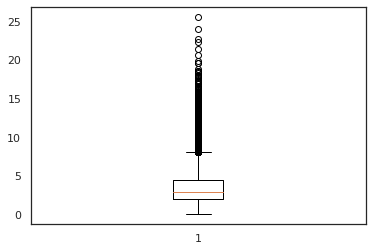

In [31]:
plt.boxplot(AnimalsDF.ITIs)
#plt.yscale('log')

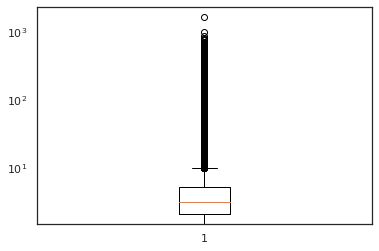

In [27]:
plt.boxplot(AnimalsDF.ITIs)
plt.yscale('log')

In [10]:
# Create a cumulative trial number for every animal BE AWARE THAT SESSIONS MIGHT HAVE BEEN REMOVED BEFORE SO THIS NUMBER IS NOT EXACT
CumTrialsList = []
for Aid in pd.unique(AnimalsDF['AnimalID']):
    CumTrialsList.append(np.arange(len(AnimalsDF[AnimalsDF['AnimalID']==Aid])) + 1)
# flatten the list of lists
AnimalsDF['CumulativeTrialNumber'] = np.array(list(chain(*[x for x in CumTrialsList])))

In [11]:
# Restart the count of CumulativeTrialNumber for every protocol
AnimalsDF['CumulativeTrialNumberByProtocol'] = np.nan

for Aid in pd.unique(AnimalsDF['AnimalID']):
    for Prot in pd.unique(AnimalsDF['Protocol']):
        conditions = np.logical_and(AnimalsDF['AnimalID']==Aid, AnimalsDF['Protocol']==Prot)
        AnimalsDF.CumulativeTrialNumberByProtocol.loc[AnimalsDF[conditions].index] = \
        np.arange(len(AnimalsDF[conditions])) + 1
            

In [12]:
# Calculate performance of the past X trials
PAST_WINDOW = 20
CumPerList = []
for Sid in pd.unique(AnimalsDF['SessionID']):
    CumPerList.append(cuf.perf_window_calculator(AnimalsDF[AnimalsDF['SessionID']==Sid], PAST_WINDOW))
# flatten the list of lists
AnimalsDF['CurrentPastPerformance20'] = np.array(list(chain(*[x for x in CumPerList])))

In [13]:
# Calculate performance of the past X trials
PAST_WINDOW = 100
CumPerList = []
for Sid in pd.unique(AnimalsDF['SessionID']):
    CumPerList.append(cuf.perf_window_calculator(AnimalsDF[AnimalsDF['SessionID']==Sid], PAST_WINDOW))
# flatten the list of lists
AnimalsDF['CurrentPastPerformance100'] = np.array(list(chain(*[x for x in CumPerList])))

In [14]:
# Number of pokes in the center
AnimalsDF['NoOfCenterPokes'] = AnimalsDF[['TrialEvents', 'TrialStates']].apply(cuf.CalculateMidPokes, axis=1)

In [15]:
# Time waiting in the middle
AnimalsDF['MiddleWaitTime'] = AnimalsDF[['TrialEvents', 'TrialStates']].apply(cuf.MidPortWait, axis=1)

In [16]:
# Time they take to innitiate the trial
AnimalsDF['TrialInitiationTime'] = AnimalsDF[['TrialEvents']].apply(cuf.CalculateTrialInitiationTime, axis=1)

In [17]:
# Calculate the right bias
AnimalsDF['RightBias'] = cuf.CalculateRBiasWindow(np.array(AnimalsDF['FirstPoke']),\
                                                              np.array(AnimalsDF['FirstPokeCorrect']), 50)

In [18]:
# Calculate speed over the surrounding 6 trials
SP_WINDOW = 6
speed_list = []
for Sid in pd.unique(AnimalsDF['SessionID']):
    speed_list.append(cuf.speed_window_calculator(AnimalsDF[AnimalsDF['SessionID']==Sid], SP_WINDOW))
# flatten the list of lists
AnimalsDF['TrialsSpeed'] = np.array(list(chain(*[x for x in speed_list])))

In [19]:
#calculate if the previous trial was a success or not
AnimalsDF['PrevTrialSuccess'] = np.insert(np.array(AnimalsDF['FirstPokeCorrect'][:-1]), 0, np.nan)

In [42]:
# name your dataset for plotting
df_to_plot = AnimalsDF

In [31]:
#Select conditions

# include only the easy trials
condition1 = np.logical_or(AnimalsDF['TrialSequence']==1, AnimalsDF['TrialSequence']==7)
conditions = condition1

# include only trials without stimulation
condition2 = AnimalsDF['OptoStim'] == 0
conditions = np.logical_and(conditions, condition2)

# remove trials in which the animal is too biased
'''
RBlimit = 0.25
condition3 = np.logical_and(AnimalsDF['RightBias'] > (-RBlimit), AnimalsDF['RightBias'] < RBlimit)
conditions = np.logical_and(conditions, condition3)
'''
# remove the trials at the beginning of the session
condition4 = AnimalsDF['TrialIndex'] > 10
conditions = np.logical_and(conditions, condition4)

# remove the Aud_Psycho
condition5 = ~(AnimalsDF['Protocol'] == 'Aud_Psycho')
conditions = np.logical_and(conditions, condition5)

# select only some protocols

prot_to_select = ['Auditory']
condition6 = AnimalsDF.Protocol.isin(prot_to_select)
conditions = np.logical_and(conditions, condition6)


# select only some experimental conditions
'''
expgr_to_select = ['CortexBuffer', '6OHDAtail']  #, 'ToSprojecting-BLAcaspase']
condition7 = AnimalsDF.ExperimentalGroup.isin(expgr_to_select)
conditions = np.logical_and(conditions, condition7)
'''
# remove some animals
'''
animals_to_remove = ['DRD101', 'DRD102', 'DRD103']
condition8 = ~AnimalsDF.AnimalID.isin(animals_to_remove)
conditions = np.logical_and(conditions, condition8)
'''

# select some animals
'''
animals_to_select = ['C01', 'C02', 'C03', 'PV01', 'PV02', 'PV03', 'PV04', 'PV05', 'PV06',
       'SomFlp04', 'SomFlp06', 'SomFlp07', 'SomFlp08', 'SomFlp09']
condition9 = AnimalsDF.AnimalID.isin(animals_to_select)
conditions = np.logical_and(conditions, condition9)
'''

# select trials up to a certain number
'''
trials_up_to = 5000
condition10 = AnimalsDF['CumulativeTrialNumberByProtocol'] <= trials_up_to
conditions = np.logical_and(conditions, condition10)
'''
df_to_plot = AnimalsDF[conditions]

In [18]:
df_to_plot.AnimalID.unique()

array([], dtype=object)

In [23]:
# Create new output dir
output_directory_name = 'invivoLTD'
outputDir = GeneralDirectory + output_directory_name + '_Analysis/'
if not os.path.isdir(outputDir):
    os.mkdir(outputDir)

In [24]:
# Save the dataframe
df_to_plot.to_pickle(outputDir + output_directory_name + '_dataframe.pkl')

In [6]:
# Read the dataframe
df_to_plot = pd.read_pickle(outputDir + output_directory_name + '_dataframe.pkl')

***
#### Get a summary of all the mice in the dataset

In [9]:
AnimalsDF.iloc[1000]

AnimalID                                                                      LTD-01
ExperimentalGroup                                                                LTD
SessionTime                                                              Jun10 12:12
FullSessionTime                                                  2021-06-10 12:12:00
Protocol                                                                    Auditory
Stimulation                                                            NoStimulation
Muscimol                                                                          No
RewardChange                                                                      No
RewardChangeBlock                                                                  0
CenterPortDuration                                                               0.1
Contingency                                                                        1
RewardAmount                                                     

Progress: [####################] 100.0%


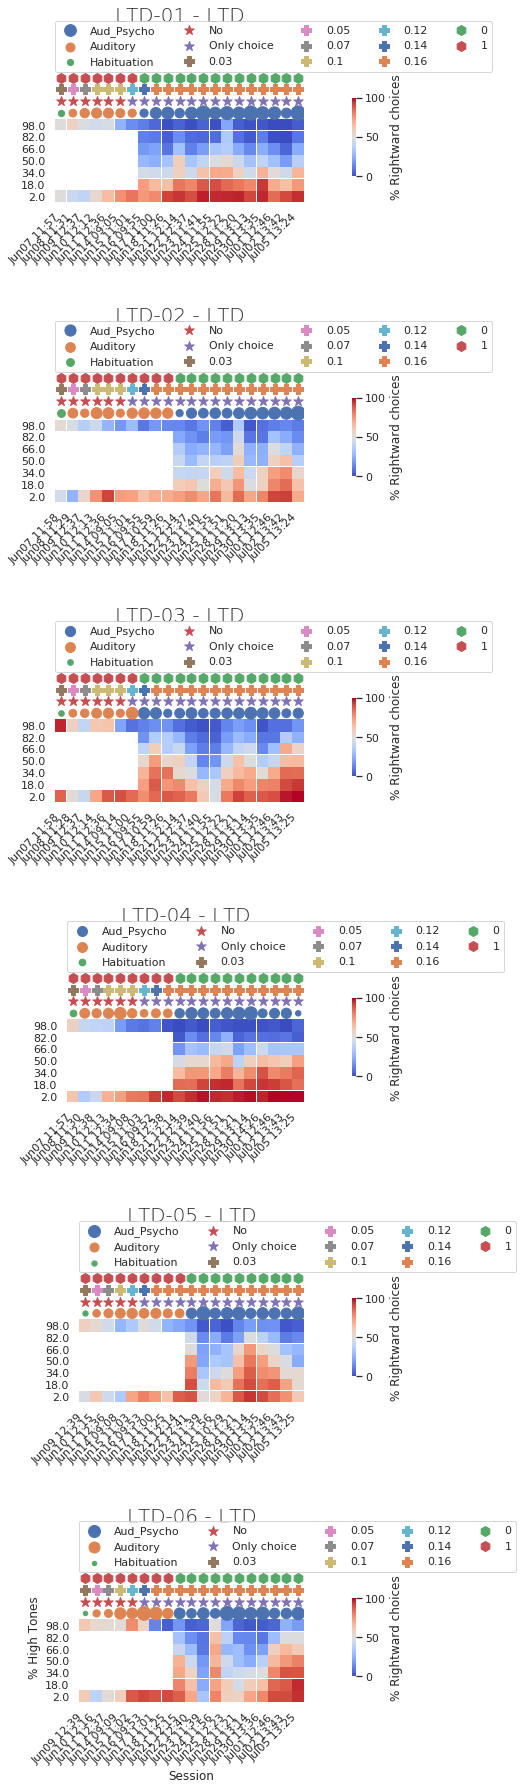

In [10]:
# plot a summary of all the animals in the dataset
fig, ax = plt.subplots(len(pd.unique(df_to_plot.AnimalID)), 1, figsize=(17,5 * len(pd.unique(df_to_plot.AnimalID))))
axs = ax.ravel()
fig.subplots_adjust(hspace=1.3)
for i, animal in enumerate(pd.unique(df_to_plot.AnimalID)):
    aDF = df_to_plot[df_to_plot.AnimalID == animal]
    dfToPlot = plot_utils.summary_matrix(aDF)
    axs[i] = plot_utils.summary_plot(dfToPlot, aDF, axs[i], top_labels=['Punish', 'CenterPortDuration', 'BiasCorrection'])
    
plt.savefig(outputDir + 'psychometricPerformanceAllSessionsHeatmap.pdf',
            transparent=True,dpi = 500, bbox_inches='tight')
plt.show(fig)

In [69]:
# remove some animals
animals_to_remove = ['SomCre05', 'SomCre06', 'SomCre07', 'SomCre08', 'SomCre09']
df_to_plot = df_to_plot[~AnimalsDF.AnimalID.isin(animals_to_remove)]


In [24]:
np.unique(df_to_plot.Protocol)

array(['Auditory'], dtype=object)

***
**Plot the evolution of the cumulative performance**
***

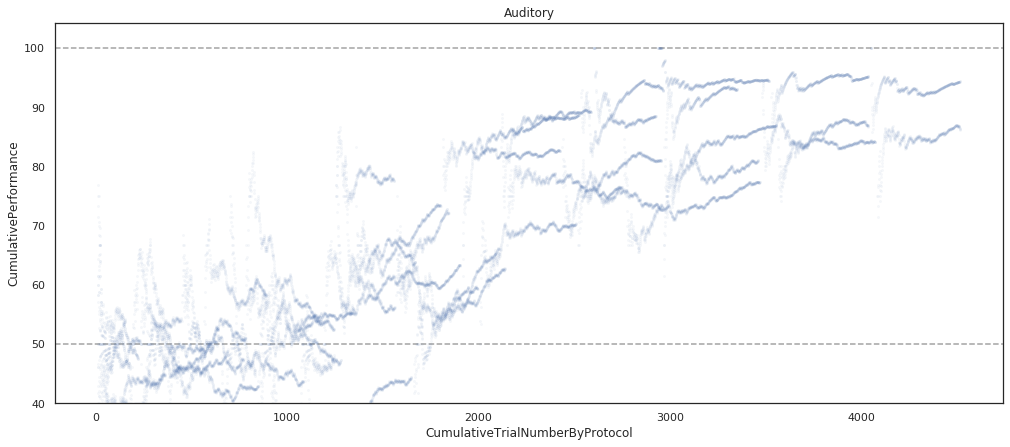

In [27]:
column_to_plot = 'CumulativePerformance'

fig, axs = plt.subplots(len(pd.unique(df_to_plot['Protocol'])), 1, figsize=(17,7 * len(pd.unique(df_to_plot['Protocol']))), sharex=True)
if axs.numRows > 1:
    axs = axs.ravel()
else:
    axs = [axs,]
fig.subplots_adjust(hspace = 0.3)
for ax in axs:
    ax.axhline(50, ls='--', alpha=0.4, color='k')
    ax.axhline(100, ls='--', alpha=0.4, color='k')

for ax, prot in enumerate(pd.unique(df_to_plot['Protocol'])):
    sns.lineplot(x='CumulativeTrialNumberByProtocol', y=column_to_plot,
                 data=df_to_plot[df_to_plot['Protocol']==prot],
                 ax=axs[ax],# hue='ExperimentalGroup', 
                 marker=".", alpha=0.05, markeredgewidth=0, linewidth=0,
                 # the following line splits the data and does not compute confidence intervals and mean
                 units="AnimalID", estimator=None)
                
    axs[ax].set_title(prot)
    axs[ax].set_ylim(bottom=40)
    '''
    lgd = axs[ax].legend(ncol=4, loc=(0,1.05), borderaxespad=0.)
    for l in lgd.get_lines():
        l.set_alpha(1)
        l.set_linewidth(4)
    '''
for ax in axs:
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
        
plt.savefig(outputDir + column_to_plot + 'ByProtocol_Grouped_AnimalSelection.pdf',
#plt.savefig(outputDir + column_to_plot + 'ByProtocol_Grouped.pdf',
            transparent=True, bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.


Shaded area indicates std, and performance is calculated using CurrentPastPerformance100


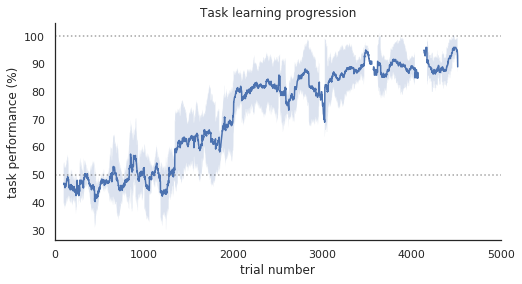

In [28]:
# EASIER EDITABLE VERSION
df_sel = df_to_plot
# create a publication-quality figure, grouping the data by the Experimental Group, and showing the continous monitoring
# of learning
col_to_plot = 'CurrentPastPerformance100'
data_mean = df_sel.groupby(['CumulativeTrialNumberByProtocol'])[col_to_plot].mean().reset_index()
st_err_mean = df_sel.groupby(['CumulativeTrialNumberByProtocol'])[col_to_plot].std().reset_index()
data_mean['low_bound'] = data_mean[col_to_plot] - st_err_mean[col_to_plot]
data_mean['high_bound'] = data_mean[col_to_plot] + st_err_mean[col_to_plot]

fig1 = plt.figure(figsize=(8, 4))
plt.axhline(50, ls='dotted', alpha=0.4, color='k')
plt.axhline(100, ls='dotted', alpha=0.4, color='k')

df = data_mean.copy()
x = df.CumulativeTrialNumberByProtocol
plt.plot(x, df[col_to_plot])
#plt.plot(data_mean[data_mean.ExperimentalGroup==eg][col_to_plot], linestyle='--', color=LSpalette[i], label='95% ci')
#plt.plot(neg_ci, linestyle='--', color='k')
y1 = df['low_bound']
y2 = df['high_bound']
plt.fill_between(x, y1, y2, where=y2 >= y1, alpha=.2, interpolate=False)

plt.ylabel(col_to_plot)
plt.xlabel('trial number')
plt.ylabel('task performance (%)')
plt.legend(loc=(0.76,0.3), frameon=False)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the legend as the figure has it's own
ax.get_legend().remove()

ax.set_xlim((0,5000))

plt.title('Task learning progression')

plt.savefig(outputDir + 'editableplot.pdf', transparent=True, bbox_inches='tight')
fig1.show()
print('Shaded area indicates std, and performance is calculated using', col_to_plot)

***
#### Plot a summary of different parameters

In [45]:
#df_to_plot = df_to_plot[np.logical_or(df_to_plot.Protocol == 'Visual', df_to_plot.Protocol == 'Auditory')]

In [ ]:
#TODO: Identify the outliers below. This violin plots suck

ValueError: There must be exactly two hue levels to use `split`.'

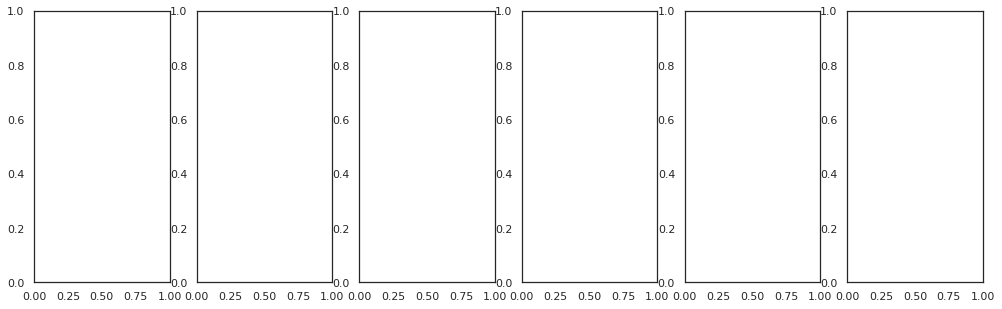

In [29]:
columns_to_plot = ['RightBias', 'CurrentPastPerformance', 'NoOfCenterPokes', 'TrialInitiationTime',\
                   'MiddleWaitTime', 'ResponseTime']
fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(17, 5))
ax = ax.ravel()
for i, col in enumerate(columns_to_plot):
    # Contingency is a hack for splitting
    sns.violinplot(x='Contingency', y=col, hue='Protocol', data=df_to_plot, split=True, scale='area', ax=ax[i])
ax[2].set_ylim(0, 10)
ax[3].set_ylim(-5, 30)
#ax[3].set_yscale('log')
ax[4].set_ylim(0, 1)
#ax[5].set_yscale('log')
ax[5].set_ylim(-1, 2)
plt.tight_layout()
        
plt.savefig(outputDir + 'General_Parameters.pdf',
            transparent=True, bbox_inches='tight')
plt.show()

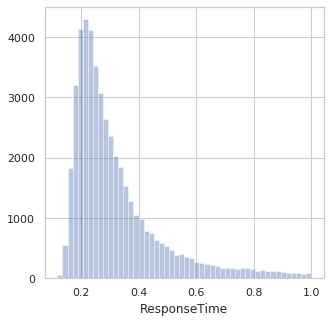

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
#sns.distplot(df_to_plot[df_to_plot['NoOfCenterPokes']<6]['NoOfCenterPokes'], kde=False, ax=ax, bins=5)
#sns.distplot(df_to_plot[df_to_plot['TrialInitiationTime']<5]['TrialInitiationTime'], kde=False, ax=ax, bins=50)
#sns.distplot(df_to_plot[df_to_plot['MiddleWaitTime']<.3]['MiddleWaitTime'], kde=False, ax=ax, bins=50)
sns.distplot(df_to_plot[df_to_plot['ResponseTime']<1]['ResponseTime'], kde=False, ax=ax, bins=50)


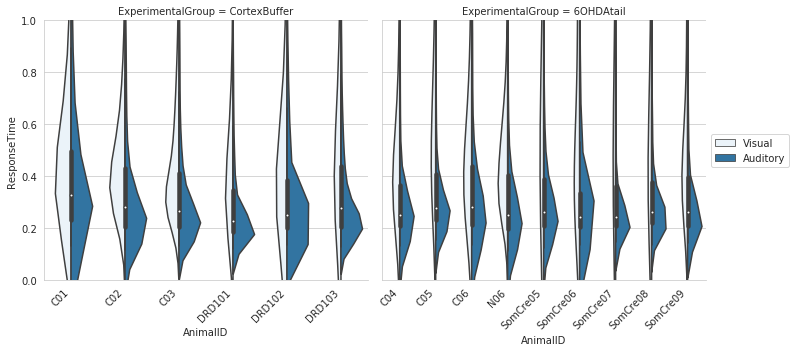

In [254]:
# split by mice
column_to_plot = 'ResponseTime'
grid = sns.FacetGrid(df_to_plot[df_to_plot[column_to_plot]<20], col="ExperimentalGroup", sharex=False, height=5)
grid.fig.tight_layout()
for i in range(len(df_to_plot.ExperimentalGroup.unique())):
    grid.axes[0,i].set_ylim(0, 1)
grid.set_xticklabels(rotation=45, horizontalalignment="right")
grid.map_dataframe(sns.violinplot, "AnimalID", column_to_plot, hue='Protocol', split=True)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.savefig(outputDir + column_to_plot + '.pdf',
            transparent=True, bbox_inches='tight')
plt.show()

In [48]:
# Check the number of sessions needed to get to 4000 auditory trials
aids = []
tottrials = []
totsessions = []
egr = []
for AID in df_to_plot.AnimalID.unique():
    aids.append(AID)
    egr.append(df_to_plot[df_to_plot['AnimalID'] == AID].ExperimentalGroup.unique()[0])
    tottrials.append(np.max(df_to_plot[df_to_plot['AnimalID'] == AID].CumulativeTrialNumberByProtocol))
    totsessions.append(len(df_to_plot[df_to_plot['AnimalID'] == AID].SessionID.unique()))

dfToPlot = pd.DataFrame({'AnimalID': aids,
                        'ExperimentalGroup': egr,
                        'TotalTrials': tottrials,
                        'TotalSessions': totsessions})

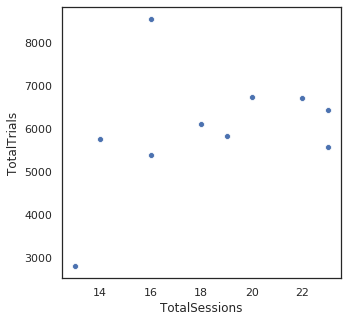

In [50]:
fig, axs = plt.subplots(1, 1, figsize=(5,5))
sns.scatterplot(x='TotalSessions', y='TotalTrials', hue='ExperimentalGroup', data=dfToPlot)


Create a simpler plot calculating the performance of the day


In [71]:
# Day of training
def getDay(df):
    return df.SessionTime.split(' ')[0]
    
df_to_plot['TrainingDay'] = df_to_plot.apply(getDay, axis=1)

In [72]:
# generate a new dataset to get the data
dfForPlot = cuf.AnalyzePercentageByDay(df_to_plot)

In [73]:
# For each animal and protocol, calculate the session count for that protocol
# ProtocolCount
dfForPlot['ProtocolCount'] = np.nan
for animal in pd.unique(dfForPlot['AnimalID']):
    for protocol in pd.unique(dfForPlot['Protocol']):
        conditions = np.logical_and(dfForPlot['AnimalID']==animal, dfForPlot['Protocol']==protocol)
        dfForPlot.ProtocolCount.loc[dfForPlot[conditions].index] = \
        np.arange(len(dfForPlot[conditions])) + 1

In [74]:
# calculate the cumulative sum of trials by protocol
dfForPlot['TrialCumSumByProtocol'] = np.nan
for animal in pd.unique(dfForPlot['AnimalID']):
    for protocol in pd.unique(dfForPlot['Protocol']):
        conditions = np.logical_and(dfForPlot['AnimalID']==animal, dfForPlot['Protocol']==protocol)
        dfForPlot.TrialCumSumByProtocol.loc[dfForPlot[conditions].index] = \
        np.cumsum(dfForPlot[conditions].NumberOfTrials)

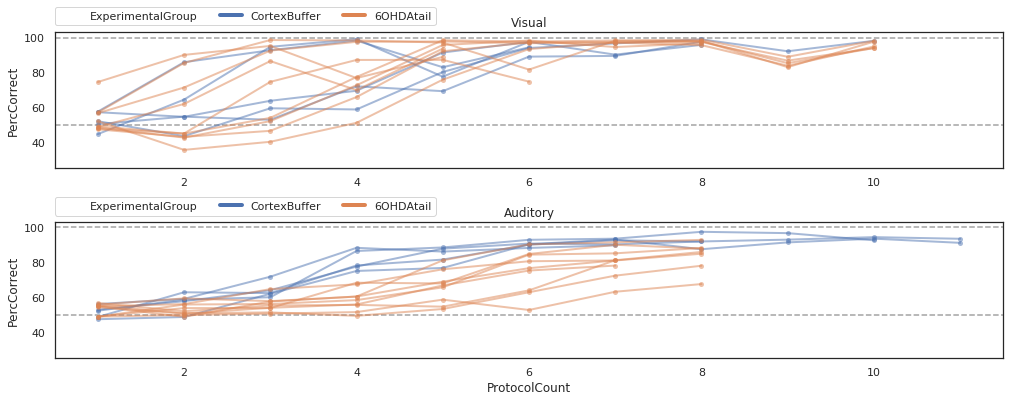

In [75]:
fig, axs = plt.subplots(len(np.unique(dfForPlot['Protocol'])),1, figsize=(17,3*len(np.unique(dfForPlot['Protocol']))), sharex=True)
axs = axs.ravel()
fig.subplots_adjust(hspace = 0.4)
for ax in axs:
    ax.axhline(50, ls='--', alpha=0.4, color='k')
    ax.axhline(100, ls='--', alpha=0.4, color='k')

for ax, prot in enumerate(pd.unique(dfForPlot['Protocol'])):
    sns.lineplot(x='ProtocolCount', y='PercCorrect',
                 data=dfForPlot[dfForPlot['Protocol']==prot],
                 ax=axs[ax], hue='ExperimentalGroup', 
                 marker=".", alpha=0.5, markeredgewidth=0, linewidth=2, markersize=10,#)
                 # the following line splits the data and does not compute confidence intervals and mean
                 units="AnimalID", estimator=None)
                
    axs[ax].set_title(prot)
    axs[ax].set_ylim(bottom=25)
    
    lgd = axs[ax].legend(ncol=4, loc=(0,1.05), borderaxespad=0.)
    for l in lgd.get_lines():
        l.set_alpha(1)
        l.set_linewidth(4)
    
for ax in axs:
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
        
plt.savefig(outputDir + 'SessionPercCorrectByProtocol.pdf',
            transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#sns.barplot(x='SessionTime', y='PercCorrect', hue='AnimalID', data=dfForPlot)

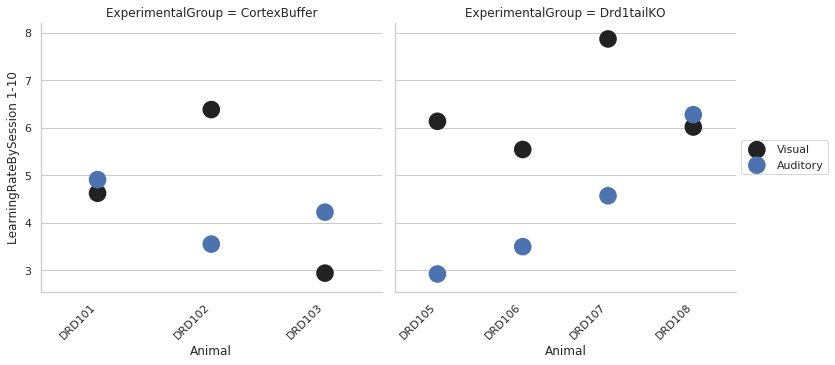

In [66]:
### CHECK THIS AND BELOW PROPERLY

# Calculate the rate of learning by animal for the first X sessions
# fit a model per animal and calculate the coefficient and plot
from_session = 1
to_session = 10
from sklearn.linear_model import LinearRegression
learning_rate_df = pd.DataFrame(columns=['AnimalID', 'ExperimentalGroup', 'Protocol', 'LearningRateBySession'])
for animal in dfForPlot.AnimalID.unique():
    for protocol in dfForPlot.Protocol.unique():
        df = dfForPlot[(dfForPlot.AnimalID == animal) & (dfForPlot.Protocol == protocol)]
        # fit model
        x = df[(df.ProtocolCount >= from_session) & (df.ProtocolCount <= to_session)].ProtocolCount
        y = df[(df.ProtocolCount >= from_session) & (df.ProtocolCount <= to_session)].PercCorrect
        lrmodel = LinearRegression().fit(x[:, np.newaxis], y)
        learning_rate_df = learning_rate_df.append({
            'AnimalID': animal,
            'ExperimentalGroup': df.ExperimentalGroup.unique()[0],
            'Protocol': protocol,
            'LearningRateBySession': lrmodel.coef_[0]
        }, ignore_index=True)
        
# plot
sns.set_style('whitegrid')
grid = sns.FacetGrid(learning_rate_df, col="ExperimentalGroup", sharex=False, sharey=True, height=5, col_wrap=5)
grid.set_xticklabels(rotation=45, horizontalalignment="right")
grid = grid.map_dataframe(sns.pointplot, x="AnimalID", y="LearningRateBySession", hue='Protocol',
                          dodge=0, join=False, markers="o", scale=2)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
grid.axes[0].set_xlabel('Animal')
grid.axes[1].set_xlabel('Animal')
grid.axes[0].set_ylabel('LearningRateBySession ' + str(from_session) + '-' + str(to_session))
plt.savefig(outputDir + 'LearningRateBySessionCoef_' + str(from_session) + '-' + str(to_session) + '.pdf',
            transparent=True, bbox_inches='tight')
plt.show()

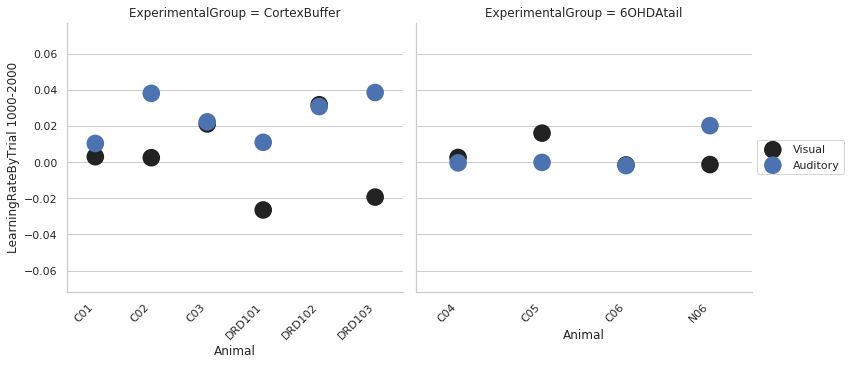

In [64]:
# Calculate the rate of learning by animal for the first X trials
# fit a model per animal and calculate the coefficient and plot
from_trial = 1000
to_trial = 2000
from sklearn.linear_model import LinearRegression
learning_rate_df = pd.DataFrame(columns=['AnimalID', 'ExperimentalGroup', 'Protocol', 'LearningRateByTrial'])
for animal in df_to_plot.AnimalID.unique():
    for protocol in df_to_plot.Protocol.unique():
    #protocol = 'Visual'
        df = df_to_plot[(df_to_plot.AnimalID == animal) & (df_to_plot.Protocol == protocol)]
        # fit model
        x = df[(df.CumulativeTrialNumberByProtocol >= from_trial) & (df.CumulativeTrialNumberByProtocol <= to_trial)].CumulativeTrialNumberByProtocol
        y = df[(df.CumulativeTrialNumberByProtocol >= from_trial) & (df.CumulativeTrialNumberByProtocol <= to_trial)].CurrentPastPerformance
        # drop NAs
        nan_mask = ~(np.isnan(x) | np.isnan(y))
        lrmodel = LinearRegression().fit(x[nan_mask, np.newaxis], y[nan_mask])
        learning_rate_df = learning_rate_df.append({
            'AnimalID': animal,
            'ExperimentalGroup': df.ExperimentalGroup.unique()[0],
            'Protocol': protocol,
            'LearningRateByTrial': lrmodel.coef_[0]
        }, ignore_index=True)
        
# plot
sns.set_style('whitegrid')
grid = sns.FacetGrid(learning_rate_df, col="ExperimentalGroup", sharex=False, sharey=True, height=5, col_wrap=5)
grid.set_xticklabels(rotation=45, horizontalalignment="right")
grid = grid.map_dataframe(sns.pointplot, x="AnimalID", y="LearningRateByTrial", hue='Protocol',
                          dodge=0, join=False, markers="o", scale=2)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
grid.axes[0].set_xlabel('Animal')
grid.axes[1].set_xlabel('Animal')
grid.axes[0].set_ylabel('LearningRateByTrial ' + str(from_trial) + '-' + str(to_trial))
plt.savefig(outputDir + 'LearningRateByTrialCoef_' + str(from_trial) + '-' + str(to_trial) + '.pdf',
            transparent=True, bbox_inches='tight')
plt.show()

In [57]:
df_to_plot.Protocol.unique()

array(['Visual', 'Auditory'], dtype=object)

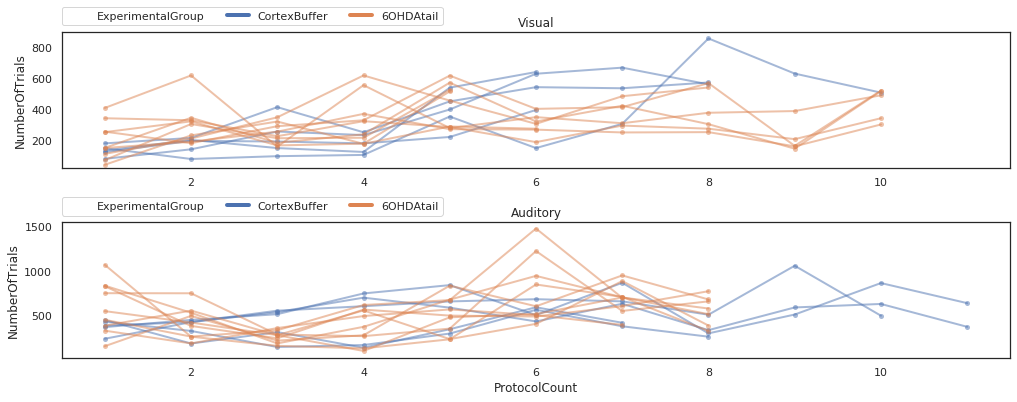

In [76]:
# Number of trials per session
fig, axs = plt.subplots(len(np.unique(dfForPlot['Protocol'])),1, figsize=(17,3*len(np.unique(dfForPlot['Protocol']))), sharex=True)
axs = axs.ravel()
fig.subplots_adjust(hspace = 0.4)

for ax, prot in enumerate(pd.unique(dfForPlot['Protocol'])):
    sns.lineplot(x='ProtocolCount', y='NumberOfTrials',
                 data=dfForPlot[dfForPlot['Protocol']==prot],
                 ax=axs[ax], hue='ExperimentalGroup', 
                 marker=".", alpha=0.5, markeredgewidth=0, linewidth=2, markersize=10,
                 # the following line splits the data and does not compute confidence intervals and mean
                 units="AnimalID", estimator=None)
                
    axs[ax].set_title(prot)
    axs[ax].set_ylim(bottom=25)
    
    lgd = axs[ax].legend(ncol=4, loc=(0,1.05), borderaxespad=0.)
    for l in lgd.get_lines():
        l.set_alpha(1)
        l.set_linewidth(4)
    
for ax in axs:
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
        
plt.savefig(outputDir + 'NumberOfTrialsByProtocol_grouped.pdf',
            transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#sns.barplot(x='SessionTime', y='PercCorrect', hue='AnimalID', data=dfForPlot)

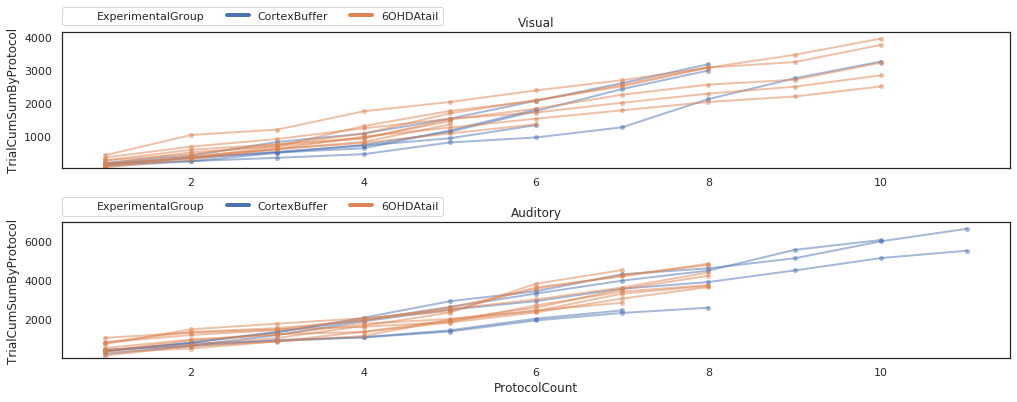

In [77]:
# do this in a cumulative way
fig, axs = plt.subplots(len(np.unique(dfForPlot['Protocol'])),1, figsize=(17,3*len(np.unique(dfForPlot['Protocol']))), sharex=True)
axs = axs.ravel()
fig.subplots_adjust(hspace = 0.4)

for ax, prot in enumerate(pd.unique(dfForPlot['Protocol'])):
    sns.lineplot(x='ProtocolCount', y='TrialCumSumByProtocol',
                 data=dfForPlot[dfForPlot['Protocol']==prot],
                 ax=axs[ax], hue='ExperimentalGroup', 
                 marker=".", alpha=0.5, markeredgewidth=0, linewidth=2, markersize=10,
                 # the following line splits the data and does not compute confidence intervals and mean
                 units="AnimalID", estimator=None)
                
    axs[ax].set_title(prot)
    axs[ax].set_ylim(bottom=25)
    
    lgd = axs[ax].legend(ncol=4, loc=(0,1.05), borderaxespad=0.)
    for l in lgd.get_lines():
        l.set_alpha(1)
        l.set_linewidth(4)
    
for ax in axs:
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
        
plt.savefig(outputDir + 'NumberOfTrialsByProtocol_Cumulative.pdf',
            transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [64]:
np.std(dfForPlot.NumberOfTrials)

270.25784261133236

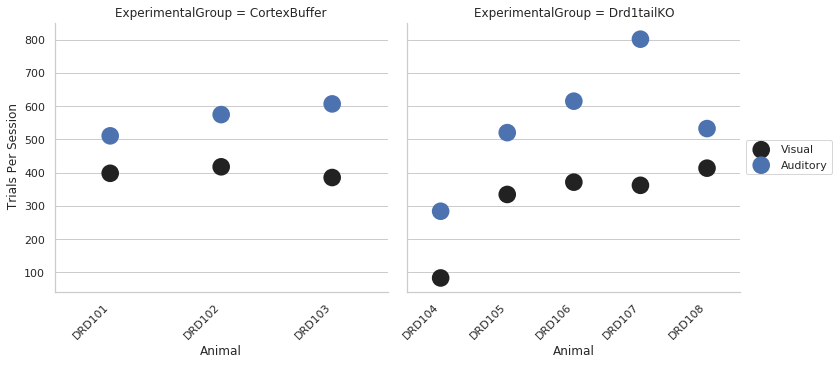

In [36]:
# fit a model per animal and calculate the coefficient and plot
from sklearn.linear_model import LinearRegression
tr_per_ss_df = pd.DataFrame(columns=['AnimalID', 'ExperimentalGroup', 'Protocol', 'TrialsPerSessionCoef'])
for animal in dfForPlot.AnimalID.unique():
    for protocol in dfForPlot.Protocol.unique():
        df = dfForPlot[(dfForPlot.AnimalID == animal) & (dfForPlot.Protocol == protocol)]
        # fit model
        x = df.ProtocolCount
        y = df.TrialCumSumByProtocol
        lrmodel = LinearRegression().fit(x[:, np.newaxis], y)
        tr_per_ss_df = tr_per_ss_df.append({
            'AnimalID': animal,
            'ExperimentalGroup': df.ExperimentalGroup.unique()[0],
            'Protocol': protocol,
            'TrialsPerSessionCoef': lrmodel.coef_[0]
        }, ignore_index=True)
        
# plot
sns.set_style('whitegrid')
grid = sns.FacetGrid(tr_per_ss_df, col="ExperimentalGroup", sharex=False, sharey=True, height=5, col_wrap=5)
grid.set_xticklabels(rotation=45, horizontalalignment="right")
grid = grid.map_dataframe(sns.pointplot, x="AnimalID", y="TrialsPerSessionCoef", hue='Protocol',
                          dodge=0, join=False, markers="o", scale=2)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
grid.axes[0].set_xlabel('Animal')
grid.axes[1].set_xlabel('Animal')
grid.axes[0].set_ylabel(' Trials Per Session')
plt.savefig(outputDir + 'TrialsPerSessionCoef.pdf',
            transparent=True, bbox_inches='tight')
plt.show()

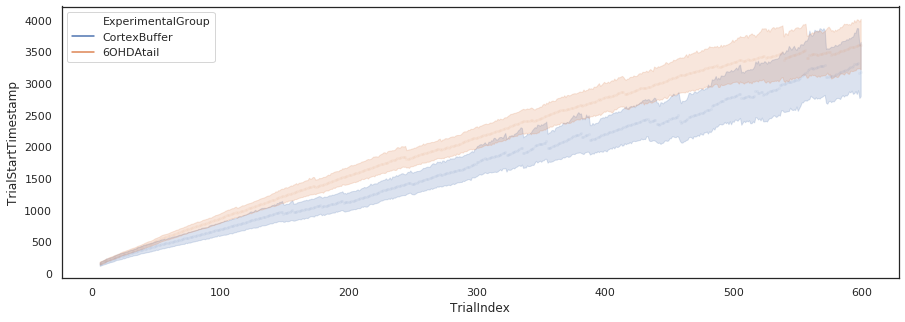

In [78]:
# plot the number of trials per session as a function of time for a Protocol and the first 600 trials
protocol = 'Auditory'
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x='TrialIndex', y='TrialStartTimestamp',
             data=df_to_plot[(df_to_plot.Protocol == protocol) & (df_to_plot.TrialIndex < 600)],
             ax=ax, hue='ExperimentalGroup', 
             marker=".", alpha=0.05, markeredgewidth=0, linewidth=0)
             # the following line splits the data and does not compute confidence intervals and mean
             #units="AnimalID", estimator=None)
plt.savefig(outputDir + 'TrialStartTimefor' + protocol + '.pdf',
            transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

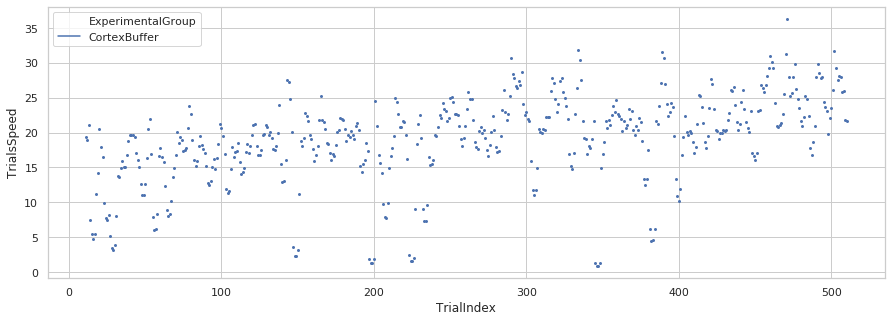

In [85]:
# plot the speed per session as a function of time
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x='TrialIndex', y='TrialsSpeed',
             data=df_to_plot[df_to_plot.SessionID==df_to_plot.SessionID.unique()[10]],
             ax=ax, hue='ExperimentalGroup', 
             marker=".", alpha=1, markeredgewidth=0, linewidth=0,
             # the following line splits the data and does not compute confidence intervals and mean
             units="AnimalID", estimator=None)

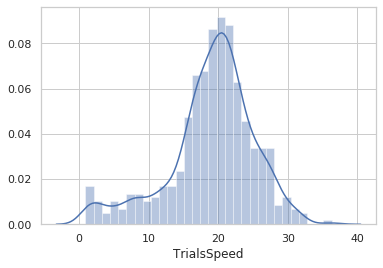

In [102]:
# plot the speed per session as a function of time
data = df_to_plot[df_to_plot.SessionID==df_to_plot.SessionID.unique()[10]]
#fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(data.TrialsSpeed.dropna(), bins=30, norm_hist=True)

ValueError: min() arg is an empty sequence

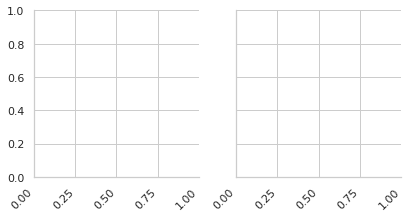

In [107]:
# This might have problems if the punish time was not the same for all
# split by mice
sns.set_style(style=None, rc=None)
protocol = 'Auditory'
column_to_plot = 'TrialsSpeed'
grid = sns.FacetGrid(df_to_plot[df_to_plot.Protocol == protocol], hue='ExperimentalGroup', col="ExperimentalGroup", sharex=False)#, height=5)
grid.fig.tight_layout()
#for i in range(len(df_to_plot.ExperimentalGroup.unique())):
#    grid.axes[0,i].set_ylim(0.1, 6)
grid.set_xticklabels(rotation=45, horizontalalignment="right")
grid.map_dataframe(sns.violinplot, "AnimalID", column_to_plot)
plt.savefig(outputDir + column_to_plot + '_' + protocol + '.pdf',
            transparent=True, bbox_inches='tight')
plt.show()

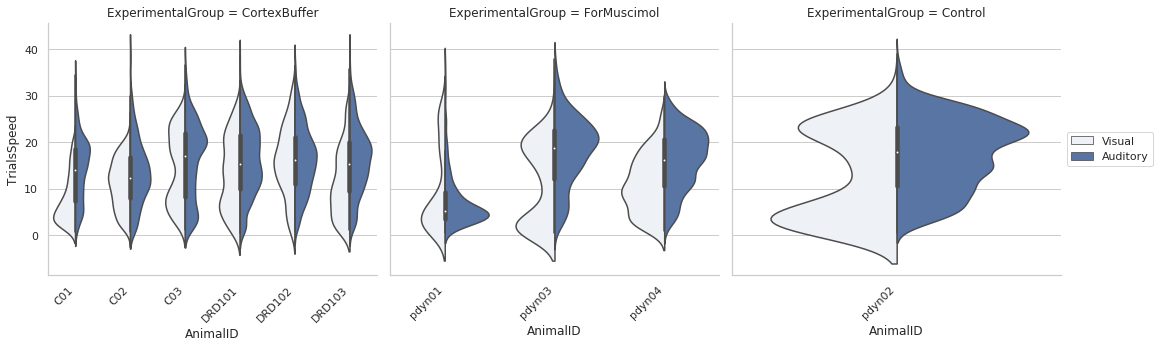

In [71]:
# Calculate the speed difference between the visual and the auditory in between a certain percentage
low_perc = 65
high_perc = 90
conditions = (df_to_plot.CurrentPastPerformance > low_perc) & (df_to_plot.CurrentPastPerformance < high_perc)

column_to_plot = 'TrialsSpeed'
grid = sns.FacetGrid(df_to_plot[conditions], col="ExperimentalGroup", sharex=False, height=5)
grid.fig.tight_layout()
#for i in range(len(df_to_plot.ExperimentalGroup.unique())):
#    grid.axes[0,i].set_ylim(0.1, 6)
grid.set_xticklabels(rotation=45, horizontalalignment="right")
grid.map_dataframe(sns.violinplot, "AnimalID", column_to_plot, hue='Protocol', split=True)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.savefig(outputDir + column_to_plot + '_protocolComparison_' + str(low_perc) + '-' + str(high_perc) + '.pdf',
            transparent=True, bbox_inches='tight')

plt.show()

In [88]:
# Calculate the differences with the medians
med_speed_df = pd.DataFrame(columns=['AnimalID', 'ExperimentalGroup', 'Protocol', 'Median', 'Mean'])
for animal in df_to_plot.AnimalID.unique():
    for protocol in df_to_plot.Protocol.unique():
        df = df_to_plot[conditions &
                    (df_to_plot.AnimalID == animal) &
                    (df_to_plot.Protocol == protocol)]

        med_speed_df = med_speed_df.append({
            'AnimalID': animal,
            'ExperimentalGroup': df.ExperimentalGroup.unique()[0],
            'Protocol': protocol,
            'Median': np.nanmedian(df.TrialsSpeed),
            'Mean': np.nanmean(df.TrialsSpeed)
        }, ignore_index=True)

IndexError: index 0 is out of bounds for axis 0 with size 0

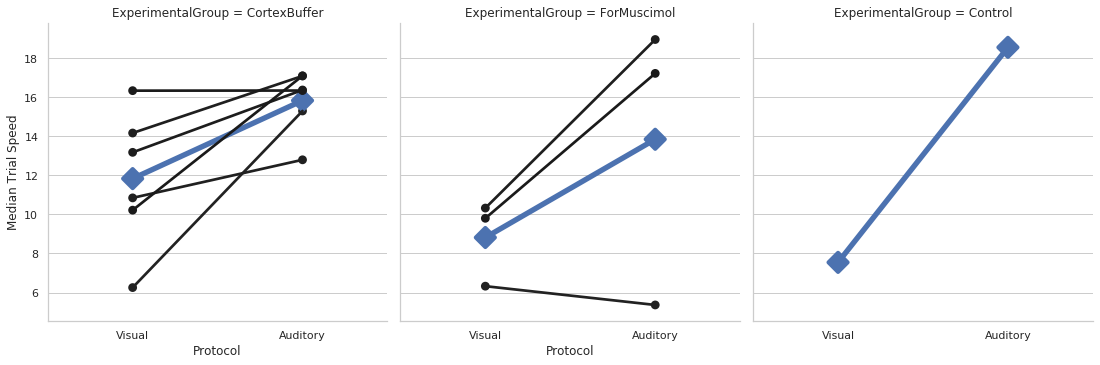

In [73]:
sns.set_style('whitegrid')
col_to_plot = 'Median'
grid = sns.FacetGrid(med_speed_df, col="ExperimentalGroup", sharex=False, sharey=True, height=5, col_wrap=5)
grid = grid.map_dataframe(sns.pointplot, x="Protocol", y=col_to_plot, hue="AnimalID",
                          dodge=0, join=True, markers="o", scale=1, ci=False, alpha=0.1, color = 'k')
grid = grid.map_dataframe(sns.pointplot, x="Protocol", y=col_to_plot,
                          dodge=0, join=True, markers="D", scale=2, ci=True)
#plt.legend(loc='center left',bbox_to_anchor=(1,0.5), title="SwitchSide")
grid.axes[0].set_xlabel('Protocol')
grid.axes[1].set_xlabel('Protocol')
grid.axes[0].set_ylabel(col_to_plot + ' Trial Speed')
plt.savefig(outputDir + col_to_plot + 'TrialSpeedProtocolComparison_' + str(low_perc) + '-' + str(high_perc) + '.pdf',
            transparent=True, bbox_inches='tight')
plt.show()

In [94]:
# plot, per animal, the decrease/increase of speed
ratio_speed_df = pd.DataFrame(columns=['AnimalID', 'ExperimentalGroup', 'MedianRatio', 'MeanRatio'])
for animal in med_speed_df.AnimalID.unique():
    df = med_speed_df[med_speed_df.AnimalID == animal]
    ratio_speed_df = ratio_speed_df.append({
        'AnimalID': animal,
        'ExperimentalGroup': df.ExperimentalGroup.unique()[0],
        'MedianRatio': float(df[df.Protocol == 'Auditory'].Median) / float(df[df.Protocol == 'Visual'].Median),
        'MeanRatio': float(df[df.Protocol == 'Auditory'].Mean) / float(df[df.Protocol == 'Visual'].Mean)
    }, ignore_index=True)

# plot
sns.set_style('whitegrid')
col_to_plot = 'MeanRatio'
grid = sns.FacetGrid(ratio_speed_df, col="ExperimentalGroup", sharex=False, sharey=True, height=5, col_wrap=5)
grid.set_xticklabels(rotation=45, horizontalalignment="right")
grid = grid.map_dataframe(sns.pointplot, x="AnimalID", y=col_to_plot,
                          dodge=0, join=False, markers="D", scale=1)
#plt.legend(loc='center left',bbox_to_anchor=(1,0.5), title="SwitchSide")
grid.axes[0].set_xlabel('Animal')
grid.axes[1].set_xlabel('Animal')
grid.axes[0].set_ylabel(col_to_plot + ' Increase in Trial Speed')
plt.savefig(outputDir + col_to_plot + 'SpeedProtocolComparison_' + str(low_perc) + '-' + str(high_perc) + '.pdf',
            transparent=True, bbox_inches='tight')
plt.show()

TypeError: cannot convert the series to <class 'float'>

In [38]:
# check the effect of the last trial on the choice.
# select data for those sessions where the performance is between 70 and 85 %
protocol = 'Auditory'
low_perc = 70
high_perc = 85
Perf_condition = (df_to_plot.CurrentPastPerformance > low_perc) & (df_to_plot.CurrentPastPerformance < high_perc)
conditions = (df_to_plot.Protocol == protocol) & Perf_condition

prev_trial_df = pd.DataFrame(columns=['AnimalID', 'ExperimentalGroup', 'PrevTrialSuccess', 'SwitchSide', 'Performance'])
for animal in df_to_plot.AnimalID.unique():
    for pts in [0,1]:
        for ss in [0,1]:
            df = df_to_plot[conditions &
                            (df_to_plot.AnimalID == animal) &
                            (df_to_plot.PrevTrialSuccess == pts) &
                            (df_to_plot.SwitchSide == ss)]
            
            prev_trial_df = prev_trial_df.append({
                'AnimalID': animal,
                'ExperimentalGroup': df.ExperimentalGroup.unique()[0],
                'PrevTrialSuccess': pts,
                'SwitchSide': ss,
                'Performance': np.mean(df.FirstPokeCorrect) * 100
            }, ignore_index=True)

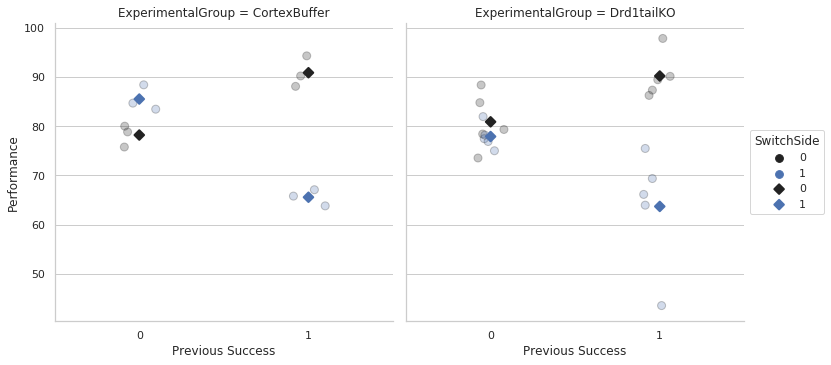

In [39]:
sns.set_style('whitegrid')
grid = sns.FacetGrid(prev_trial_df, col="ExperimentalGroup", sharex=False, sharey=True, height=5, col_wrap=5)
grid = grid.map_dataframe(sns.stripplot, x="PrevTrialSuccess", y="Performance", hue="SwitchSide", dodge=False, jitter=True,
                          alpha=.25, zorder=1, size=8,
                          linewidth=1)
grid = grid.map_dataframe(sns.pointplot, x="PrevTrialSuccess", y="Performance", hue="SwitchSide",
                          dodge=0, join=False,
                          markers="D", scale=1, ci=None)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5), title="SwitchSide")
grid.axes[0].set_xlabel('Previous Success')
grid.axes[1].set_xlabel('Previous Success')
grid.axes[0].set_ylabel('Performance')
plt.savefig(outputDir + 'EffectOfPreviousTrial_' + protocol + '_' + str(low_perc) + '-' + str(high_perc) + '.pdf',
            transparent=True, bbox_inches='tight')
plt.show()

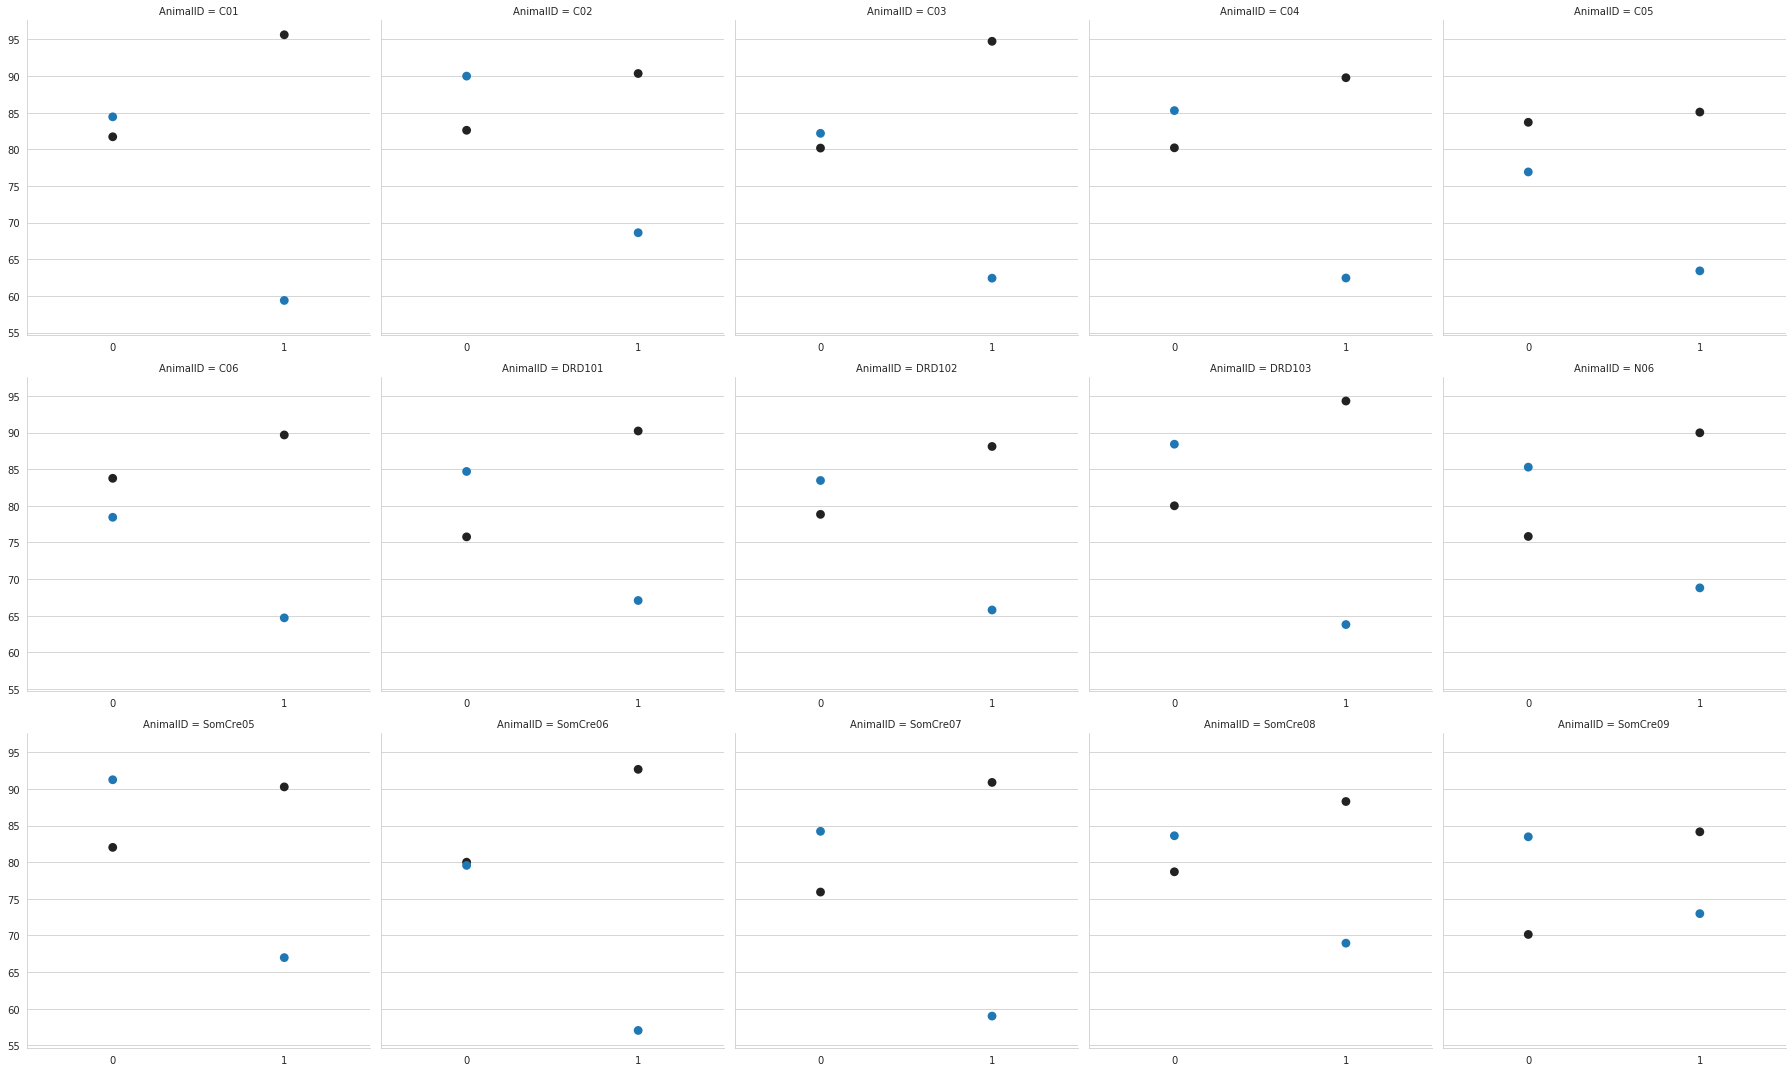

In [131]:
# plot all animals
grid = sns.FacetGrid(prev_trial_df, col="AnimalID", sharex=False, sharey=True, height=5, col_wrap=5)
#grid.fig.tight_layout()
#grid.set_xticklabels(rotation=45, horizontalalignment="right")
grid.map_dataframe(sns.pointplot, x="PrevTrialSuccess", y="Performance", hue="SwitchSide", join=False)

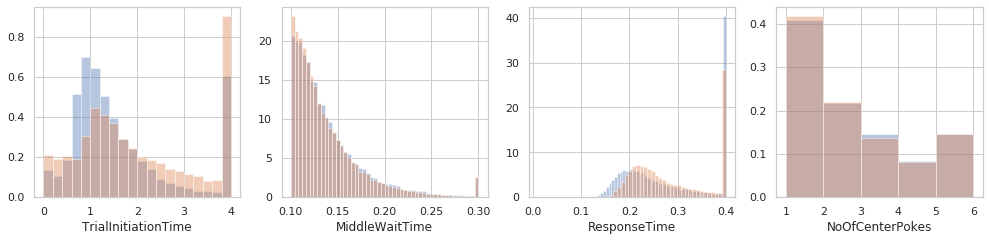

In [81]:
protocol = 'Auditory'
expgroup = '6OHDAtail'
df = df_to_plot[df_to_plot.Protocol == protocol]
# collapse values
df.loc[df.TrialInitiationTime > 4, 'TrialInitiationTime'] = 4
df.loc[df.MiddleWaitTime > .3, 'MiddleWaitTime'] = .3
df.loc[df.ResponseTime > .4, 'ResponseTime'] = .4
df.loc[df.NoOfCenterPokes > 6, 'NoOfCenterPokes'] = 6


sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 4, figsize=(17, 3.5))
ax = axs.ravel()

sns.distplot(df[df.ExperimentalGroup == 'CortexBuffer'].TrialInitiationTime, kde=False, ax=ax[0], bins=20, norm_hist=True)
sns.distplot(df[df.ExperimentalGroup == expgroup].TrialInitiationTime, kde=False, ax=ax[0], bins=20, norm_hist=True)

sns.distplot(df[df.ExperimentalGroup == 'CortexBuffer'].MiddleWaitTime, kde=False, ax=ax[1], bins=50, norm_hist=True)
sns.distplot(df[df.ExperimentalGroup == expgroup].MiddleWaitTime, kde=False, ax=ax[1], bins=50, norm_hist=True)

sns.distplot(df[df.ExperimentalGroup == 'CortexBuffer'].ResponseTime, kde=False, ax=ax[2], bins=50, norm_hist=True)
sns.distplot(df[df.ExperimentalGroup == expgroup].ResponseTime, kde=False, ax=ax[2], bins=50, norm_hist=True)

sns.distplot(df[df.ExperimentalGroup == 'CortexBuffer'].NoOfCenterPokes, kde=False, ax=ax[3], bins=5, norm_hist=True)
sns.distplot(df[df.ExperimentalGroup == expgroup].NoOfCenterPokes, kde=False, ax=ax[3], bins=5, norm_hist=True)

plt.savefig(outputDir + 'Times_' + protocol + '.pdf',
            transparent=True, bbox_inches='tight')

In [77]:
df.CenterPortDuration.describe()

count    37983.000000
mean         0.112153
std          0.047780
min          0.100000
25%          0.100000
50%          0.100000
75%          0.100000
max          0.300000
Name: CenterPortDuration, dtype: float64

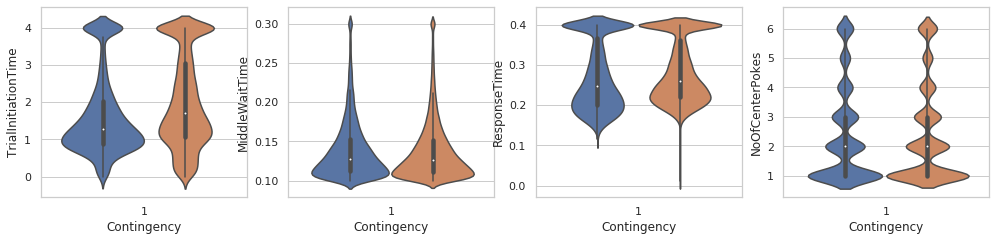

In [82]:
# try to do the boxplots / violinplots
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 4, figsize=(17, 3.5))
ax = axs.ravel()
sns.violinplot(x = 'Contingency', y = 'TrialInitiationTime', hue='ExperimentalGroup', data = df, ax=ax[0])
ax[0].get_legend().remove()
sns.violinplot(x = 'Contingency', y = 'MiddleWaitTime', hue='ExperimentalGroup', data = df, ax=ax[1])
ax[1].get_legend().remove()
sns.violinplot(x = 'Contingency', y = 'ResponseTime', hue='ExperimentalGroup', data = df, ax=ax[2])
ax[2].get_legend().remove()
sns.violinplot(x = 'Contingency', y = 'NoOfCenterPokes', hue='ExperimentalGroup', data = df, ax=ax[3])
ax[3].get_legend().remove()

In [ ]:
# 

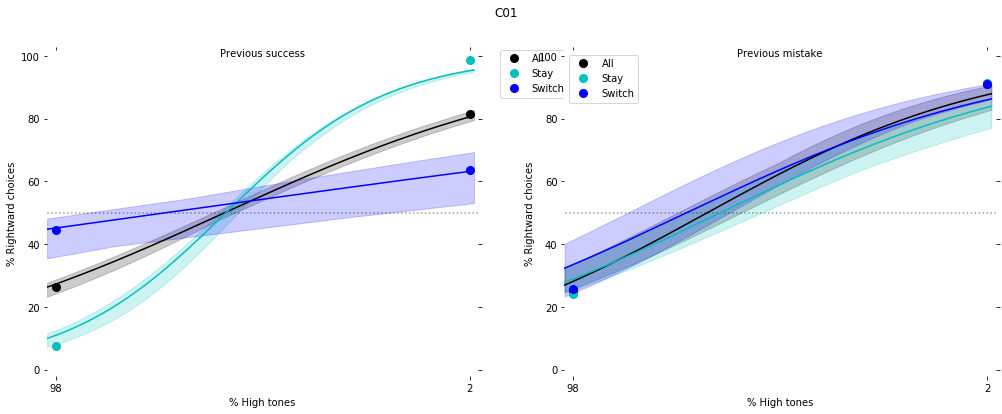

In [29]:
# check the effect of the last trial on the choice.
# select data for those sessions where the performance is between 70 and 85 %
protocol = 'Auditory'
low_perc = 70
high_perc = 85
Perf_condition = (df_to_plot.CurrentPastPerformance > low_perc) & (df_to_plot.CurrentPastPerformance < high_perc)


animal = 'C01'
pulledData = df_to_plot[(df_to_plot.Protocol == protocol) & Perf_condition & (df_to_plot.AnimalID == animal)]

# Plot differences if it the mouse has to switch, and if the previous trial was a success or not
# generate a list of the conditions, colors and labels
CondList = [(pulledData.PrevTrialSuccess==1),
            (pulledData.PrevTrialSuccess==1) & (pulledData['SwitchSide']==0),
            (pulledData.PrevTrialSuccess==1) & (pulledData['SwitchSide']==1),
            (pulledData.PrevTrialSuccess==0),
            (pulledData.PrevTrialSuccess==0) & (pulledData['SwitchSide']==0),
            (pulledData.PrevTrialSuccess==0) & (pulledData['SwitchSide']==1)
            ]
ColorList = ['k', 'c', 'b', 'k', 'c', 'b']
LabelList = ['All', 'Stay', 'Switch', 'All', 'Stay', 'Switch']
AxsOrder = [0,0,0,1,1,1]
SubplotTitles = ['Previous success', 'Previous mistake']
# plot
fig, axs = plt.subplots(1,2,figsize=(17, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()
fig.subplots_adjust(hspace = 0.3)
for i, ax in enumerate(axs):
    ax.hlines(50, 0, 100, linestyles='dotted' , alpha=0.4)
    ax.text(50,100, SubplotTitles[i], horizontalalignment='center')
for i, condition in enumerate(CondList):
    predictDif, PsyPer, fakePredictions, predictPer, _ =\
    cuf.PP_ProcessExperiment(pulledData[condition], bootstrap=5)
    if PsyPer:
        plot_utils.PlotPsychPerformance(dataDif = PsyPer['Difficulty'], dataPerf = PsyPer['Performance'],
                     predictDif = predictDif, ax = axs[AxsOrder[i]], fakePred = fakePredictions,
                     realPred = predictPer, color = ColorList[i], label = LabelList[i])
lgd = plt.legend()
plt.suptitle(animal)
plt.show(fig)

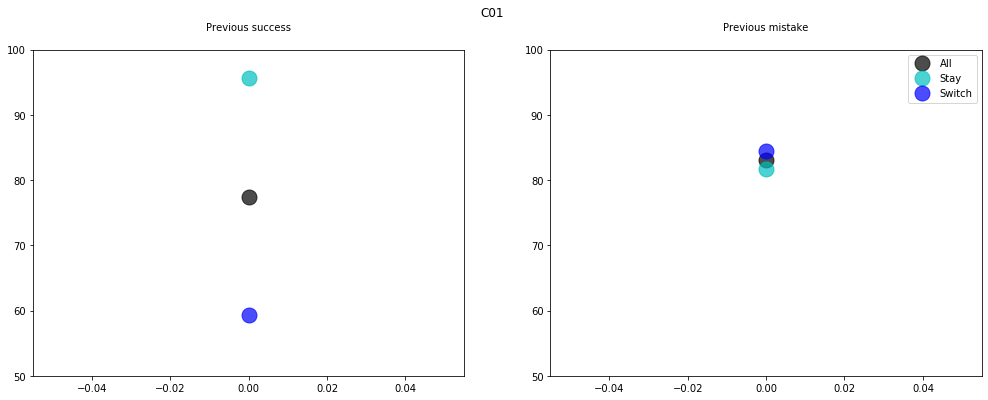

In [50]:
# plot
fig, axs = plt.subplots(1,2,figsize=(17, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()
fig.subplots_adjust(hspace = 0.3)
for i, ax in enumerate(axs):
    #ax.hlines(50, -0.2, 0.2, linestyles='dotted' , alpha=0.4)
    ax.text(0,103, SubplotTitles[i], horizontalalignment='center')
    ax.set_ylim(50,100)
for i, condition in enumerate(CondList):
    axs[AxsOrder[i]].plot(0, np.mean(pulledData[condition].FirstPokeCorrect) * 100,
                          'o', color=ColorList[i], label=LabelList[i], markersize=15, alpha=0.7)
lgd = plt.legend()
plt.suptitle(animal)
plt.show(fig)

In [16]:
# DEPRECATED *****

# Make a column with the group each mouse is in


def AssignToGroup(df):
    # Copy the AnimalIDList
    #AnimalIDList = ['C01', 'C02', 'C03', 'N01', 'N02', 'N03', 'N05']
    AnimalIDList = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'N06']
    # Create a vector here that is like the AnimalIDList
    #AnimalGroup = ['CortexBuffer', 'CortexBuffer', 'CortexBuffer', 'NMDA', 'NMDA', 'NMDA', 'NMDA']
    AnimalGroup = ['CortexBuffer', 'CortexBuffer', 'CortexBuffer', '6OHDA', '6OHDA', '6OHDA', '6OHDA']
    # Index position
    IndxPos = AnimalIDList.index(df['AnimalID'])
    return AnimalGroup[IndxPos]



AnimalsDF['Injection'] = AnimalsDF.apply(AssignToGroup, axis=1)

In [62]:
# Calculate the performance based on these trials only
EasyDF = AnimalsDF[conditions]

# calculate the cumulative performance
def CumPerCalculator(df):
    firstpokecorrect = df['FirstPokeCorrect']
    correct_cp = np.cumsum(firstpokecorrect == 1)
    incorrect_cp = np.cumsum(firstpokecorrect == 0)
    cumper = 100 * correct_cp / (correct_cp + incorrect_cp)
    return cumper

CumPerList = []
for Sid in pd.unique(EasyDF['SessionID']):
    CumPerList.append(CumPerCalculator(EasyDF[EasyDF['SessionID']==Sid]))
# flatten the list of lists
EasyDF['CumulativePerformance'] = np.array(list(chain(*[x for x in CumPerList])))


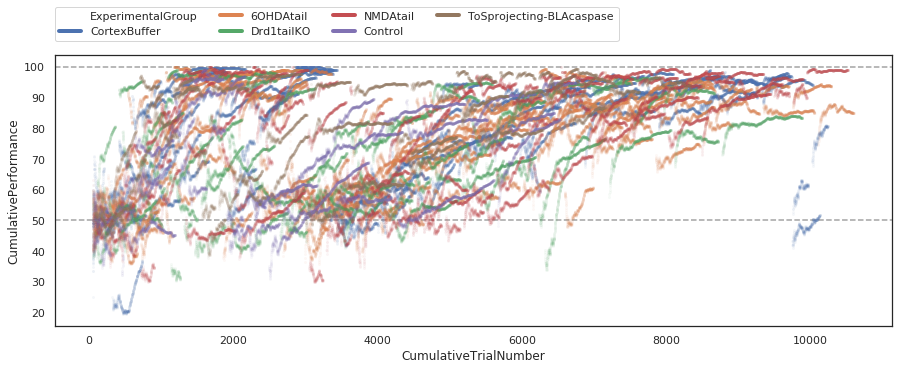

In [64]:
# remove the trials at the beginning of the session because it makes it noisy
condition4 = EasyDF['TrialIndex'] > 50

# remove the Aud_Psycho
condition5 = ~(EasyDF['Protocol'] == 'Aud_Psycho')

fig, ax = plt.subplots(figsize=(15,5))
ax.axhline(50, ls='--', alpha=0.4, color='k')
ax.axhline(100, ls='--', alpha=0.4, color='k')
sns.lineplot(x='CumulativeTrialNumber', y='CumulativePerformance', data=EasyDF[np.logical_and(condition4, condition5)],
             hue='ExperimentalGroup', marker=".", alpha=0.05, markeredgewidth=0, linewidth=0,
             units="AnimalID", estimator=None)

lgd = plt.legend(ncol=4, loc=(0,1.05), borderaxespad=0.)
for l in lgd.get_lines():
    l.set_alpha(1)
    l.set_linewidth(4)

plt.savefig(outputDir + 'CumulativePerformance.pdf',
            transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Analyze specific sessions

In [31]:
# Group sessions by type
protToGroup = 'Aud_Psycho'
stimToGroup = 'Right'
pulledData = AnimalsDF[(AnimalsDF['Protocol']==protToGroup) & (AnimalsDF['Stimulation']==stimToGroup)]

PlotsTitle = protToGroup + '_' + stimToGroup


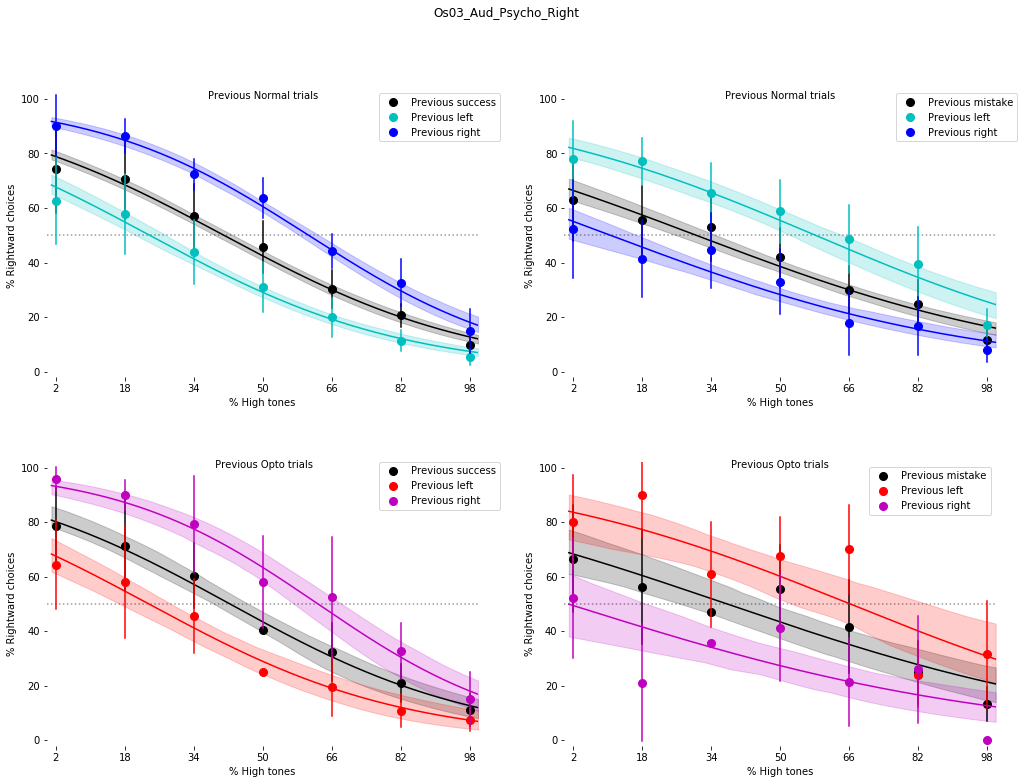

In [32]:
# Check responses to where the previous trial was (L or R) and previous success
PrevTrialSuccess = np.insert(np.array(pulledData['FirstPokeCorrect'][:-1]), 0, np.nan)
PrevTrialSide = np.insert(np.array(pulledData['TrialSide'][:-1]), 0, np.nan)
PrevOptoCondition = np.insert(np.array(pulledData['OptoStim'][:-1]), 0, np.nan)
# generate a list of the conditions, colors and labels
CondList = [(PrevOptoCondition==0) & (PrevTrialSuccess==1),
            (PrevOptoCondition==0) & (PrevTrialSuccess==1) & (PrevTrialSide==1),
            (PrevOptoCondition==0) & (PrevTrialSuccess==1) & (PrevTrialSide==2),
            (PrevOptoCondition==0) & (PrevTrialSuccess==0),
            (PrevOptoCondition==0) & (PrevTrialSuccess==0) & (PrevTrialSide==1),
            (PrevOptoCondition==0) & (PrevTrialSuccess==0) & (PrevTrialSide==2),
            (PrevOptoCondition==1) & (PrevTrialSuccess==1),
            (PrevOptoCondition==1) & (PrevTrialSuccess==1) & (PrevTrialSide==1),
            (PrevOptoCondition==1) & (PrevTrialSuccess==1) & (PrevTrialSide==2),
            (PrevOptoCondition==1) & (PrevTrialSuccess==0),
            (PrevOptoCondition==1) & (PrevTrialSuccess==0) & (PrevTrialSide==1),
            (PrevOptoCondition==1) & (PrevTrialSuccess==0) & (PrevTrialSide==2)]
ColorList = ['k', 'c', 'b', 'k', 'c', 'b','k', 'r', 'm', 'k', 'r', 'm']
LabelList = ['Previous success', 'Previous left', 'Previous right', 'Previous mistake', 'Previous left', 'Previous right',\
             'Previous success', 'Previous left', 'Previous right', 'Previous mistake', 'Previous left', 'Previous right']
AxsOrder = [0,0,0,1,1,1,2,2,2,3,3,3]
SubplotTitles = ['Previous Normal trials', 'Previous Normal trials', ' Previous Opto trials', 'Previous Opto trials',]
# plot
fig, axs = plt.subplots(2,2,figsize=(17, 12), facecolor='w', edgecolor='k')
axs = axs.ravel()
fig.subplots_adjust(hspace = 0.3)
for i, ax in enumerate(axs):
    ax.hlines(50, 0, 100, linestyles='dotted' , alpha=0.4)
    ax.text(50,100, SubplotTitles[i], horizontalalignment='center')
for i, condition in enumerate(CondList):
    predictDif, PsyPer, fakePredictions, predictPer, EB =\
    custom_functions.PP_ProcessExperiment(pulledData[condition], 100, error_bars='SessionTime')
    if PsyPer:
        plot_utils.PlotPsychPerformance(dataDif = PsyPer['Difficulty'], dataPerf = PsyPer['Performance'],
                     predictDif = predictDif, ax = axs[AxsOrder[i]], fakePred = fakePredictions,
                     realPred = predictPer, color = ColorList[i], label = LabelList[i], errorBars = EB)
lgd = plt.legend()
plt.suptitle(AnimalID + '_' + protToGroup + '_' + stimToGroup)
plt.show(fig)

In [22]:
pulledData[condition]

,AnimalID,CenterPortDuration,Contingency,CumulativePerformance,FirstPoke,FirstPokeCorrect,OptoStim,Outcomes,PreviousChoice,Protocol,...,SessionTime,Stimulation,SwitchSide,TrialEvents,TrialHighPerc,TrialIndex,TrialSequence,TrialSide,TrialStartTimestamp,TrialStates
8243,Ot03,0.2,1,81.818182,2.0,1.0,0.0,1.0,1.0,Aud_Psycho,...,Apr10 17:04,Right,0,"{'Port2Out': 13.4641, 'Port3In': 13.7342000000...",2.0,54,7.0,2.0,442.8032,"{'Punish': [nan, nan], 'WaitForResponse': [13...."
8622,Ot03,0.2,1,75.483871,1.0,1.0,0.0,1.0,1.0,Aud_Psycho,...,Apr11 15:07,Right,1,"{'Port2Out': 1.5248, 'Tup': [1.304, 1.9156, 1....",82.0,155,2.0,1.0,1310.3586,"{'Punish': [nan, nan], 'WaitForResponse': [1.5..."
8746,Ot03,0.2,1,73.835125,2.0,1.0,0.0,1.0,1.0,Aud_Psycho,...,Apr11 15:07,Right,0,"{'Port2Out': [0.2605, 1.3077999999999999], 'Tu...",18.0,279,6.0,2.0,2399.2494,"{'Punish': [nan, nan], 'WaitForResponse': [1.3..."
8782,Ot03,0.2,1,74.920635,1.0,0.0,0.0,0.0,1.0,Aud_Psycho,...,Apr11 15:07,Right,0,"{'Port2Out': [0.6073, 1.5582], 'Port2In': [0.1...",34.0,315,5.0,2.0,2641.9858,"{'Punish': [0.888, 3.888], 'WaitForResponse': ..."
8794,Ot03,0.2,1,74.617737,1.0,1.0,1.0,1.0,1.0,Aud_Psycho,...,Apr11 15:07,Right,1,"{'Port2Out': 0.7432000000000001, 'Port2In': 0....",82.0,327,2.0,1.0,2704.2392,"{'Punish': [nan, nan], 'WaitForResponse': [0.7..."
8871,Ot03,0.2,1,74.009901,1.0,1.0,0.0,1.0,1.0,Aud_Psycho,...,Apr11 15:07,Right,1,"{'Port2Out': [0.1731, 0.7647], 'Tup': [0.7366,...",98.0,404,1.0,1.0,3130.9387,"{'Punish': [nan, nan], 'WaitForResponse': [0.7..."
8937,Ot03,0.2,1,73.617021,2.0,0.0,1.0,0.0,1.0,Aud_Psycho,...,Apr11 15:07,Right,1,"{'Port2Out': [0.129, 0.3712, 1.4578, 2.2376], ...",82.0,470,2.0,1.0,3526.9308,"{'Punish': [0.6781, 3.6780999999999997], 'Wait..."
8963,Ot03,0.2,1,72.782258,1.0,1.0,0.0,1.0,1.0,Aud_Psycho,...,Apr11 15:07,Right,1,"{'Port2Out': [0.5776, 1.3668, 1.4332, 2.2259],...",98.0,496,1.0,1.0,3785.6409,"{'Punish': [nan, nan], 'WaitForResponse': [2.2..."
8973,Ot03,0.2,1,72.332016,1.0,0.0,0.0,0.0,1.0,Aud_Psycho,...,Apr11 15:07,Right,0,"{'Port2Out': 12.4845, 'Port2In': 12.265, 'Tup'...",2.0,506,7.0,2.0,3989.3998,"{'Punish': [12.786100000000001, 15.78610000000..."
8976,Ot03,0.2,1,71.905697,1.0,0.0,0.0,0.0,1.0,Aud_Psycho,...,Apr11 15:07,Right,0,"{'Port2Out': [49.916599999999995, 51.1585], 'P...",50.0,509,4.0,2.0,4069.6394,"{'Punish': [51.4601, 54.4601], 'WaitForRespons..."
